In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler



sb.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
#Displaying the dataset
dataset = pd.read_csv("/content/drive/MyDrive/MY-Ml-Projects/dataset.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
#check shape of dataset
dataset.shape

(303, 14)

In [8]:
#display the features of the dataset
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#checking the dat types of the columns
dataset.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [10]:
#display top 5 records of the dataset
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
#display the bottom 5 records
dataset.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
#display random sample records from my dataset
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0


In [13]:
#checking attributes of the different features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#check counts of each record
dataset.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        261   0    0        186      1      0.0      2      0   2     1         1
77   1    0   125       304   0    0        162      1      0.0      2      3   2     0         1
Name: count, Length: 302, dtype: int64

In [15]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Data Cleaning and Data Wrangling

In [16]:
#renaming some of the columns to make more meaning
dataset.rename(columns= {'chol' : 'cholesterol', 'cp' :'chest_pain',
                         'trestbps':'rest_bps',
                         'fbs':'fasting_bps',
                         'thalach':'max_heartRate',
                         'exang':'exercise_angina', 'ca':'major_vessels','thal':'blood_disorder'}, inplace = True)

In [17]:
#dispalying the data frame to see the renamed columns
dataset

,age,sex,chest_pain,rest_bps,cholesterol,fasting_bps,restecg,max_heartRate,exercise_angina,oldpeak,slope,major_vessels,blood_disorder,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
#checking for null or empty records
dataset.isna().sum()

,0
age,0
sex,0
chest_pain,0
rest_bps,0
cholesterol,0
fasting_bps,0
restecg,0
max_heartRate,0
exercise_angina,0
oldpeak,0


In [19]:
#Checking duplicates in the datasset
dataset.loc[dataset.duplicated()]

,age,sex,chest_pain,rest_bps,cholesterol,fasting_bps,restecg,max_heartRate,exercise_angina,oldpeak,slope,major_vessels,blood_disorder,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [20]:
#Removing the duplicates
dataset = dataset.loc[~dataset.duplicated()]\
                 .reset_index(drop = True).copy()

In [21]:
#checking shape of our new data fame now
dataset.shape

(302, 14)

Text(0.5, 1.0, 'Outliers in age')

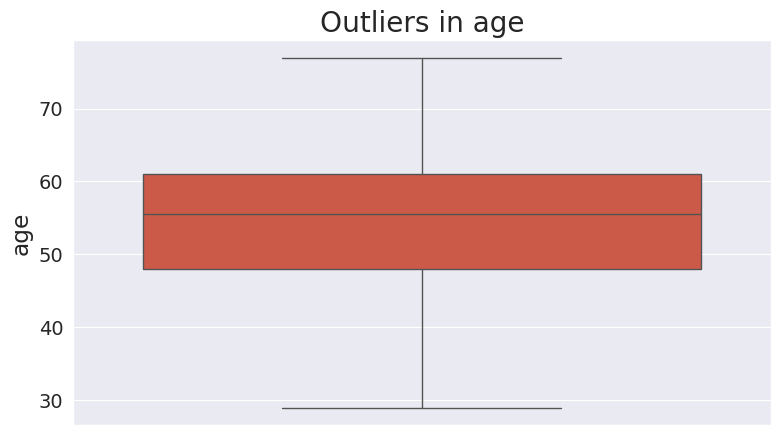

In [22]:
#checking potential outliers in Age column
base_color = sb.color_palette()[0]
sb.boxplot(data = dataset,  y = 'age', color = base_color)
plt.xticks(rotation =15);
plt.title('Outliers in age')


Text(0.5, 1.0, 'Outliers in rest_bps')

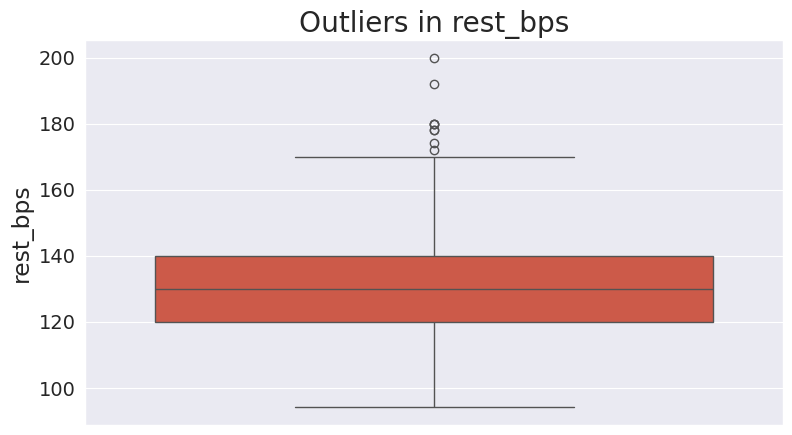

In [23]:
#checking potential outliers in resting blood pressure column
base_color = sb.color_palette()[0]
sb.boxplot(data = dataset,  y = 'rest_bps', color = base_color)
plt.xticks(rotation =15);
plt.title('Outliers in rest_bps')

Text(0.5, 1.0, 'Outliers in cholesterol')

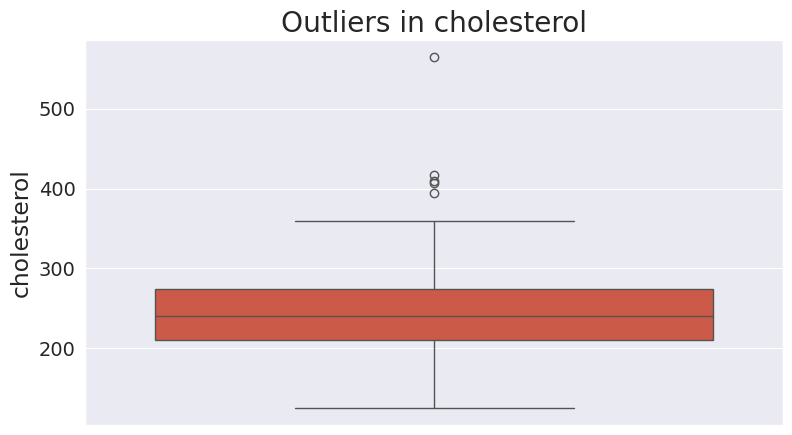

In [24]:
#checking potential outliers in Cholesterol column
base_color = sb.color_palette()[0]
sb.boxplot(data = dataset,  y = 'cholesterol', color = base_color)
plt.xticks(rotation =15);
plt.title('Outliers in cholesterol')

Text(0.5, 1.0, 'Outliers in max_heartrate')

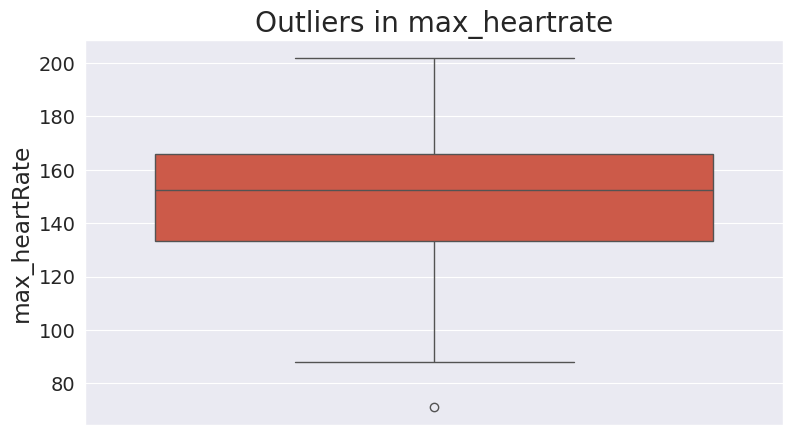

In [27]:
#checking potential outliers in Max_heartrate column
base_color = sb.color_palette()[0]
sb.boxplot(data = dataset,  y = 'max_heartRate', color = base_color)
plt.xticks(rotation =15);
plt.title('Outliers in max_heartrate')

Text(0.5, 1.0, 'OldPeak with Outliers')

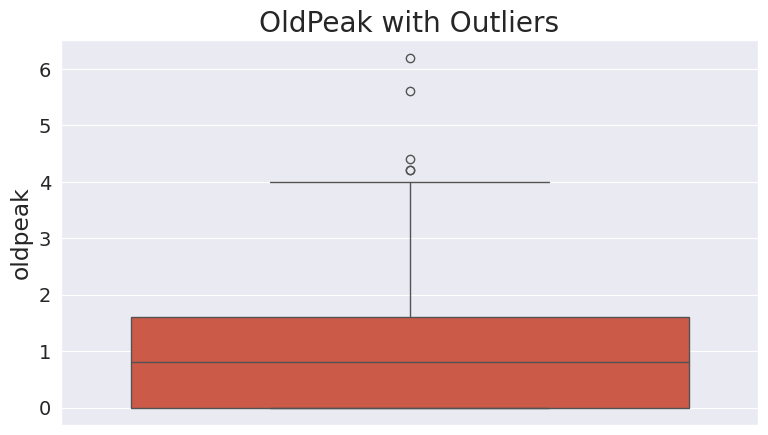

In [28]:
#checking potential outliers in oldpeak column
base_color = sb.color_palette()[0]
sb.boxplot(data = dataset,  y = 'oldpeak', color = base_color)
plt.xticks(rotation =15);
plt.title('OldPeak with Outliers')

In [29]:
#Z-score method
#finding the limits for cholesteral
upper_limit =dataset['cholesterol'].mean()+3*dataset['cholesterol'].std()
lower_limit =dataset['cholesterol'].mean()-3*dataset['cholesterol'].std()
print('upper_limit', upper_limit)
print('lower_limit', lower_limit)


upper_limit 401.76046596722165
lower_limit 91.23953403277832


In [30]:
#Trimming method to remove the outliers
new_dataset=dataset.loc[(dataset['cholesterol']<upper_limit) & (dataset['cholesterol']>lower_limit)]
print('before removing outliers', len(dataset))
print('after removing outliers', len(new_dataset))
print('outliers:', len(dataset)-len(new_dataset) )

before removing outliers 302
after removing outliers 298
outliers: 4


Text(0.5, 1.0, 'Cholesterol after removing Outliers')

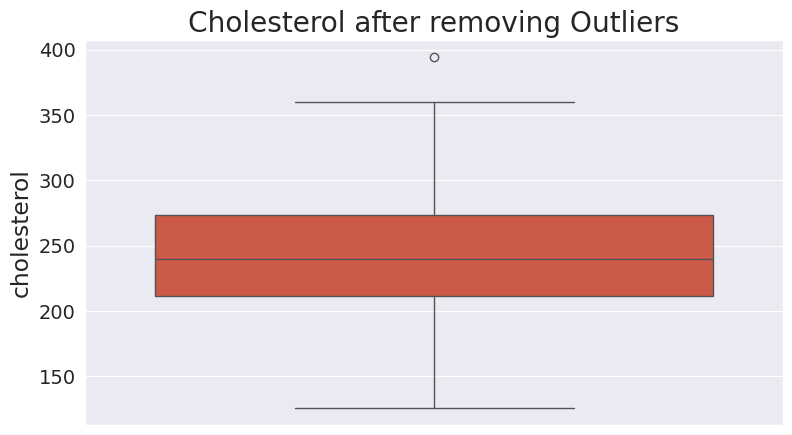

In [31]:
base_color = sb.color_palette()[0]
sb.boxplot(data = new_dataset,  y = 'cholesterol', color = base_color)
plt.xticks(rotation =15);
plt.title('Cholesterol after removing Outliers')

In [32]:
new_dataset.shape

(298, 14)

In [33]:
#finding the limits for rest_bps
upper_limit =new_dataset['rest_bps'].mean()+3*new_dataset['rest_bps'].std()
lower_limit =new_dataset['rest_bps'].mean()-3*new_dataset['rest_bps'].std()
print('upper_limit', upper_limit)
print('lower_limit', lower_limit)

upper_limit 184.40649504079735
lower_limit 78.71431032833019


In [34]:
#Trimming method to remove the outliers for rest_bps
new_dataset1=new_dataset.loc[(new_dataset['rest_bps']<upper_limit) & (new_dataset['rest_bps']>lower_limit)]
print('before removing outliers', len(new_dataset))
print('after removing outliers', len(new_dataset1))
print('outliers:', len(new_dataset)-len(new_dataset1) )

before removing outliers 298
after removing outliers 296
outliers: 2


Text(0.5, 1.0, 'rest_bps after removing Outliers')

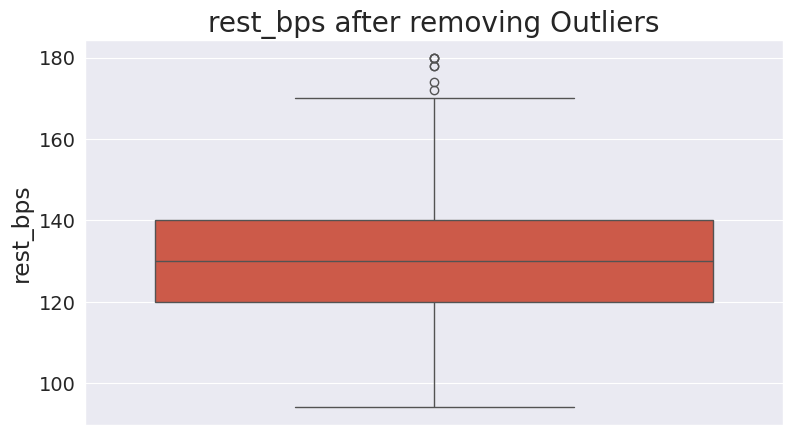

In [35]:
base_color = sb.color_palette()[0]
sb.boxplot(data = new_dataset1,  y = 'rest_bps', color = base_color)
plt.xticks(rotation =15);
plt.title('rest_bps after removing Outliers')

In [36]:
#finding the limits for max_bps
upper_limit =new_dataset1['max_heartRate'].mean()+3*new_dataset1['max_heartRate'].std()
lower_limit =new_dataset1['max_heartRate'].mean()-3*new_dataset1['max_heartRate'].std()
print('upper_limit', upper_limit)
print('lower_limit', lower_limit)

upper_limit 218.2425042633139
lower_limit 80.54803627722664


In [37]:
#Trimming method to remove the outliers for rest_bps
new_dataset2=new_dataset1.loc[(new_dataset1['max_heartRate']<upper_limit) & (new_dataset1['max_heartRate']>lower_limit)]
print('before removing outliers', len(new_dataset1))
print('after removing outliers', len(new_dataset2))
print('outliers:', len(new_dataset)-len(new_dataset2) )

before removing outliers 296
after removing outliers 295
outliers: 3


Text(0.5, 1.0, 'max_heartRate after removing Outliers')

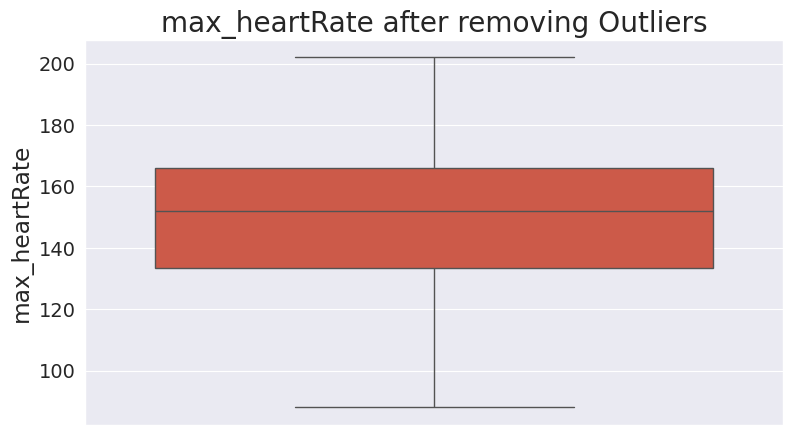

In [38]:
base_color = sb.color_palette()[0]
sb.boxplot(data = new_dataset2,  y = 'max_heartRate', color = base_color)
plt.xticks(rotation =15);
plt.title('max_heartRate after removing Outliers')

In [39]:
#finding the limits for oldpeak
upper_limit =new_dataset2['oldpeak'].mean()+3*new_dataset1['oldpeak'].std()
lower_limit =new_dataset2['oldpeak'].mean()-3*new_dataset1['oldpeak'].std()
print('upper_limit', upper_limit)
print('lower_limit', lower_limit)

upper_limit 4.455428385829028
lower_limit -2.4100046570154676


In [40]:
#Trimming method to remove the outliers for oldpeak
new_dataset3=new_dataset2.loc[(new_dataset2['oldpeak']<upper_limit) & (new_dataset2['oldpeak']>lower_limit)]
print('before removing outliers', len(new_dataset2))
print('after removing outliers', len(new_dataset3))
print('outliers:', len(new_dataset)-len(new_dataset3) )

before removing outliers 295
after removing outliers 293
outliers: 5


Text(0.5, 1.0, 'oldpeak after removing Outliers')

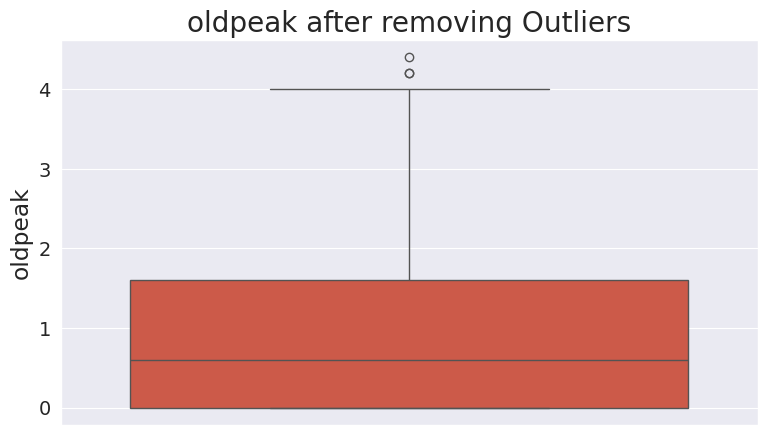

In [41]:
base_color = sb.color_palette()[0]
sb.boxplot(data = new_dataset3,  y = 'oldpeak', color = base_color)
plt.xticks(rotation =15);
plt.title('oldpeak after removing Outliers')

In [42]:
#Our shabe of the new data set
new_dataset3.shape

(293, 14)

In [43]:
len(new_dataset3)

293

In [44]:
new_dataset3.describe()

,age,sex,chest_pain,rest_bps,cholesterol,fasting_bps,restecg,max_heartRate,exercise_angina,oldpeak,slope,major_vessels,blood_disorder,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.232082,0.692833,0.976109,131.034130,243.880546,0.146758,0.535836,149.808874,0.327645,0.989420,1.412969,0.699659,2.300341,0.552901
std,9.078467,0.462109,1.035058,16.831931,45.755860,0.354470,0.526274,22.488604,0.470158,1.076138,0.605428,0.995830,0.612568,0.498044
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [45]:
#Seperating the Variables
continous_var =['age','rest_bps', 'cholesterol', 'max_heartRate', 'oldpeak'  ]
categorical_var =['sex', 'chest_pain', 'fasting_bps','restecg', 'exercise_angina', 'slope', 'major_vessels', 'blood_disorder' ]
target_var = ['taregt']

In [46]:
#Data Visualization and Exploratory Analysis
#Univariate Analysis
#Bivariate Analysis
#Multivariate Abalysis

In [47]:
#Display our categorical values
categorical_var

['sex',
 'chest_pain',
 'fasting_bps',
 'restecg',
 'exercise_angina',
 'slope',
 'major_vessels',
 'blood_disorder']

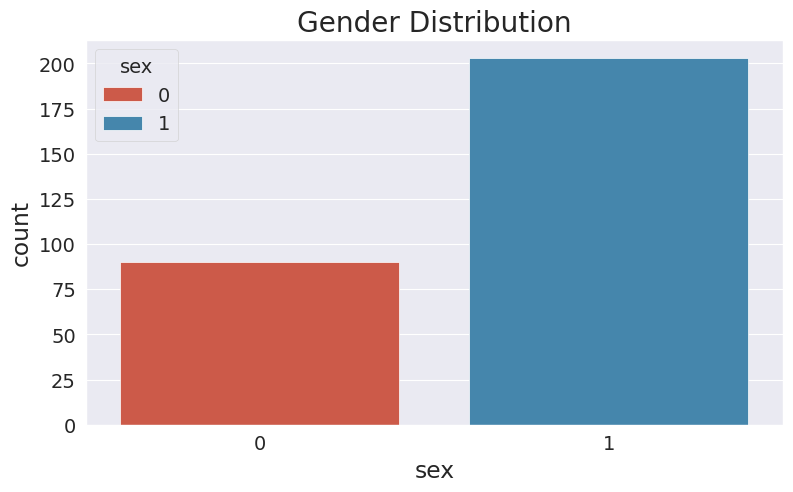

In [48]:
#plot of sex
ax = sb.countplot(x ='sex', data = new_dataset3, hue = 'sex')
plt.title("Gender Distribution")
plt.show()

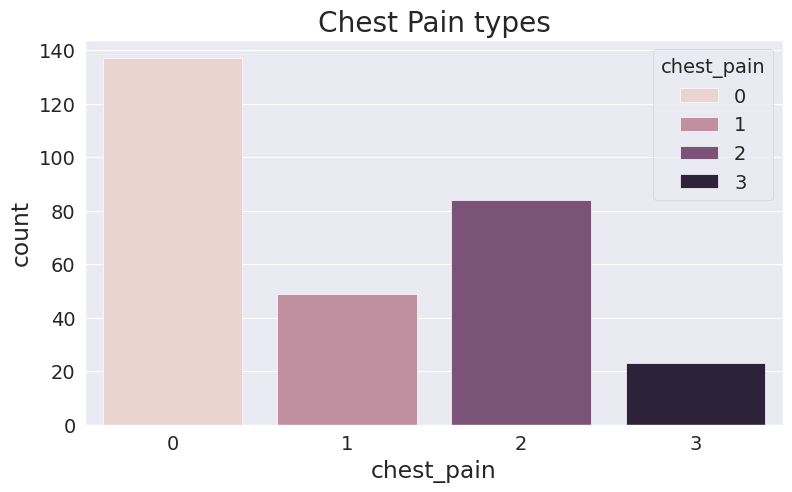

In [49]:
#plot of chest pain types
sb.countplot(x ='chest_pain', data = new_dataset3, hue = 'chest_pain')
plt.title("Chest Pain types")
plt.show()

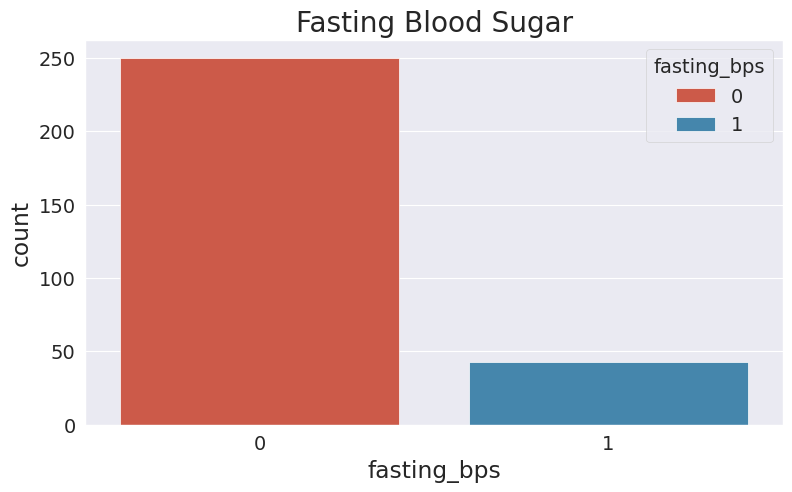

In [50]:
#plot of fasting blood sugar
sb.countplot(x ='fasting_bps', data = new_dataset3, hue = 'fasting_bps')
plt.title("Fasting Blood Sugar")
plt.show()

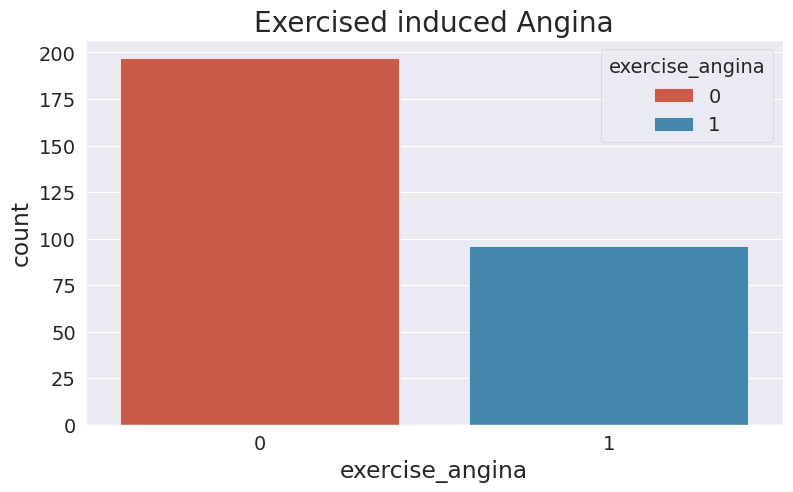

In [51]:
#plot of execise induced angina
sb.countplot(x ='exercise_angina', data = new_dataset3, hue = 'exercise_angina')
plt.title("Exercised induced Angina")
plt.show()

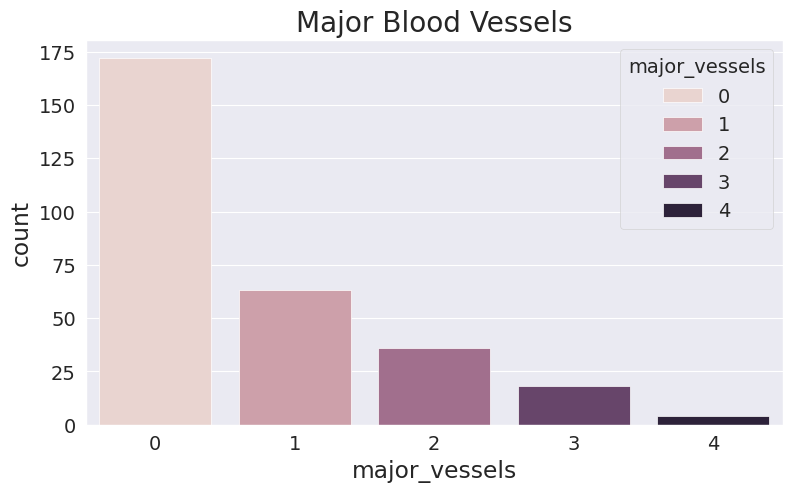

In [52]:
#plot of major blood vessels
sb.countplot(x ='major_vessels', data = new_dataset3, hue = 'major_vessels')
plt.title("Major Blood Vessels")
plt.show()

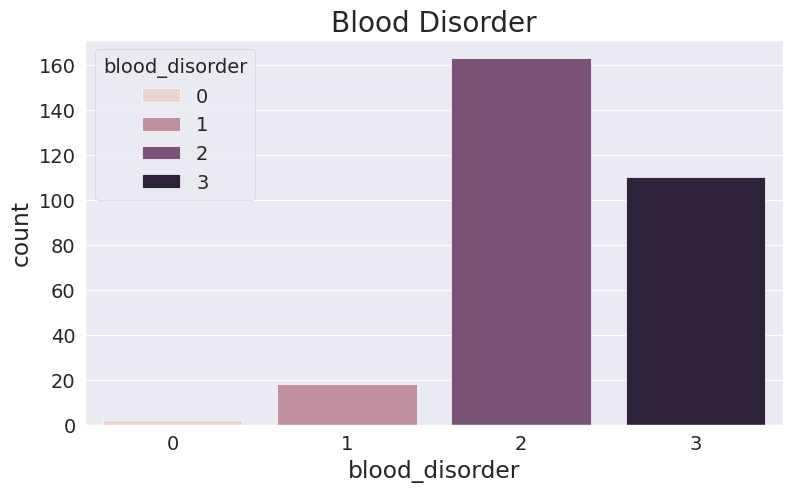

In [53]:
#plot of sex
sb.countplot(x ='blood_disorder', data = new_dataset3, hue = 'blood_disorder')
plt.title("Blood Disorder")
plt.show()

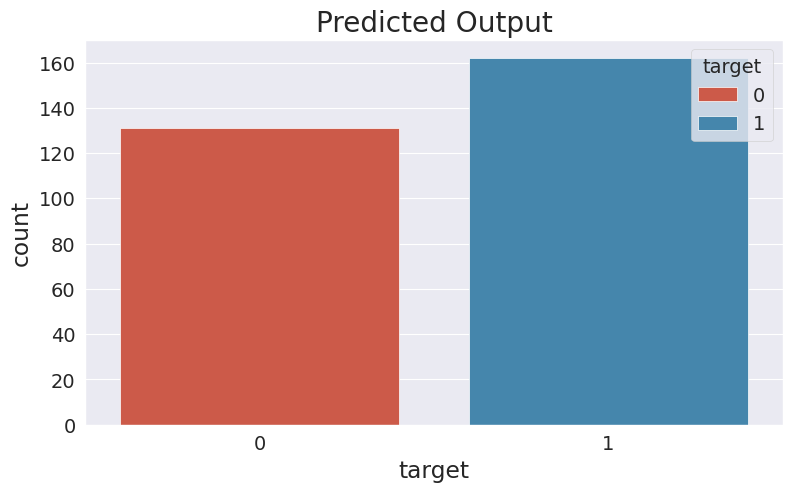

In [54]:
#plot of target
sb.countplot(x ='target', data = new_dataset3, hue = 'target')
plt.title('Predicted Output')
plt.show()

In [55]:
continous_var

['age', 'rest_bps', 'cholesterol', 'max_heartRate', 'oldpeak']

<ipython-input-56-ad53056673dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxenplot(y=new_dataset3.age,
<ipython-input-56-ad53056673dc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxenplot(y=new_dataset3.rest_bps,
<ipython-input-56-ad53056673dc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxenplot(y=new_dataset3.cholesterol,
<ipython-input-56-ad53056673dc>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.bo

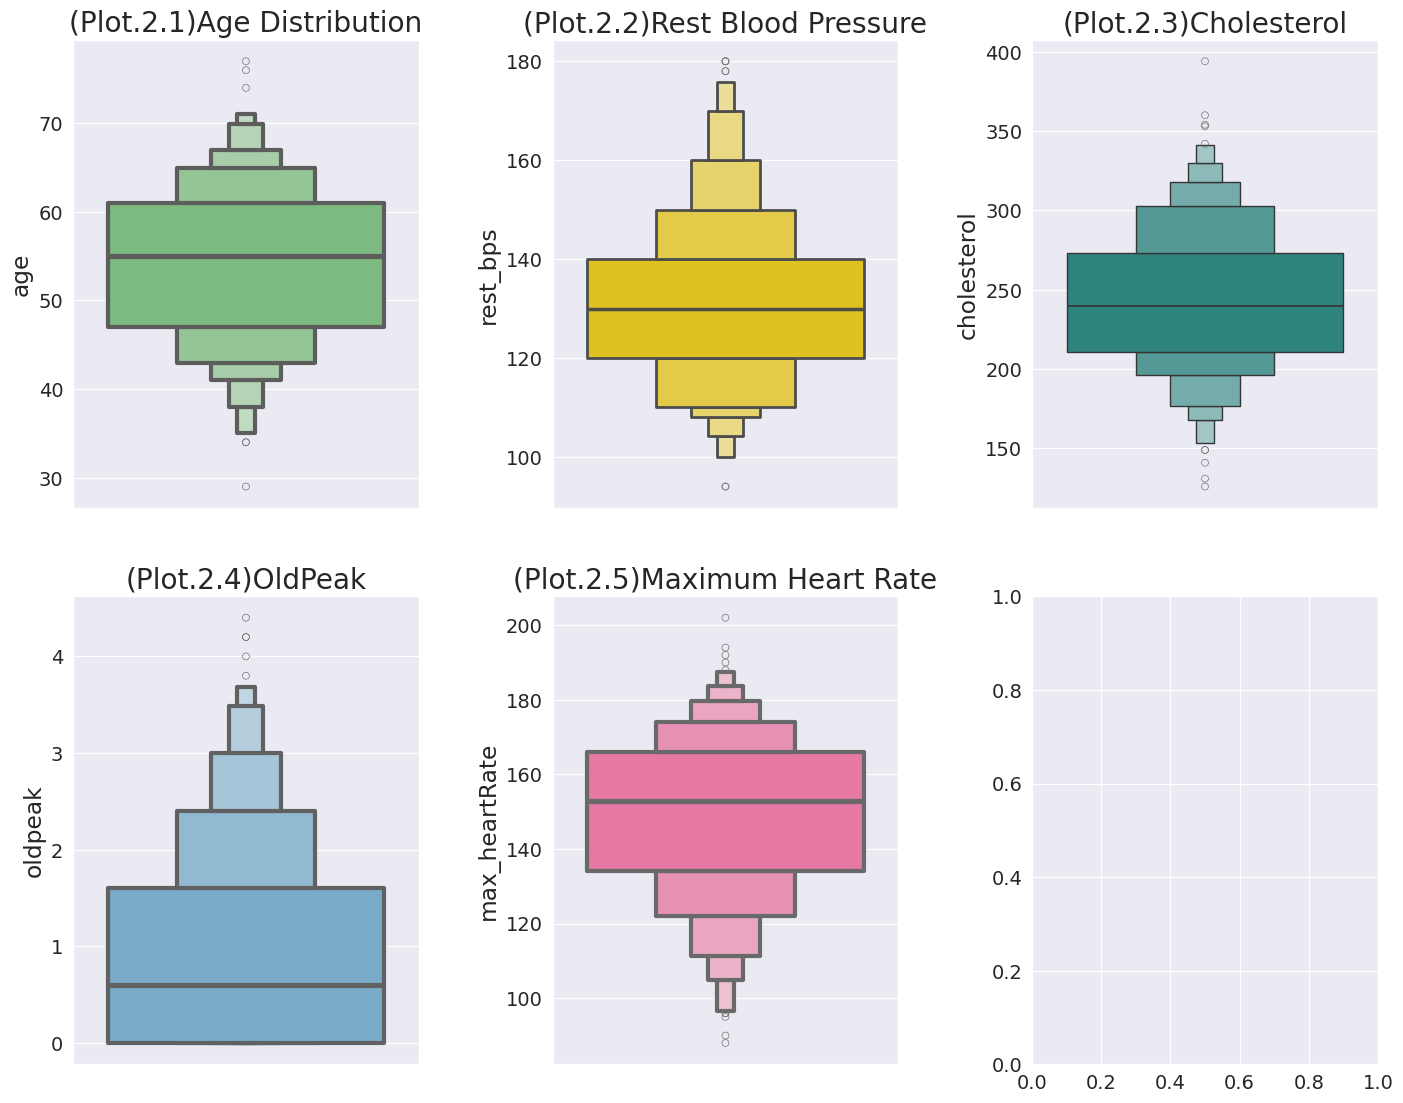

In [56]:
#Univariate analysis of continous variables

fig, axes = plt.subplots(2,3, figsize=(15,12))

#use the axis for plotting
axes[0, 0].set_title('(Plot.2.1)Age Distribution')
sb.boxenplot(y=new_dataset3.age,
            palette='Greens',
            color='red',
           linewidth=3,
           ax=axes[0,0]);


#use the axis for plotting
axes[0,1].set_title('(Plot.2.2)Rest Blood Pressure')
sb.boxenplot(y=new_dataset3.rest_bps,
            palette='prism',
            color='red',
           linewidth=2,
           ax=axes[0,1]);


#use the axis for plotting
axes[0, 2].set_title('(Plot.2.3)Cholesterol')
sb.boxenplot(y=new_dataset3.cholesterol,
            palette='viridis',
           linewidth=1,
           ax=axes[0,2]);


#use the axis for plotting
axes[1, 0].set_title('(Plot.2.4)OldPeak')
sb.boxenplot(y=new_dataset3.oldpeak,
            palette='Blues_r',
            color='red',
           linewidth=3,
           ax=axes[1,0]);


#use the axis for plotting
axes[1, 1].set_title('(Plot.2.5)Maximum Heart Rate')
sb.boxenplot(y=new_dataset3.max_heartRate,
            palette='RdPu',
            color='red',
           linewidth=3,
           ax=axes[1,1]);




plt.tight_layout(pad=3);

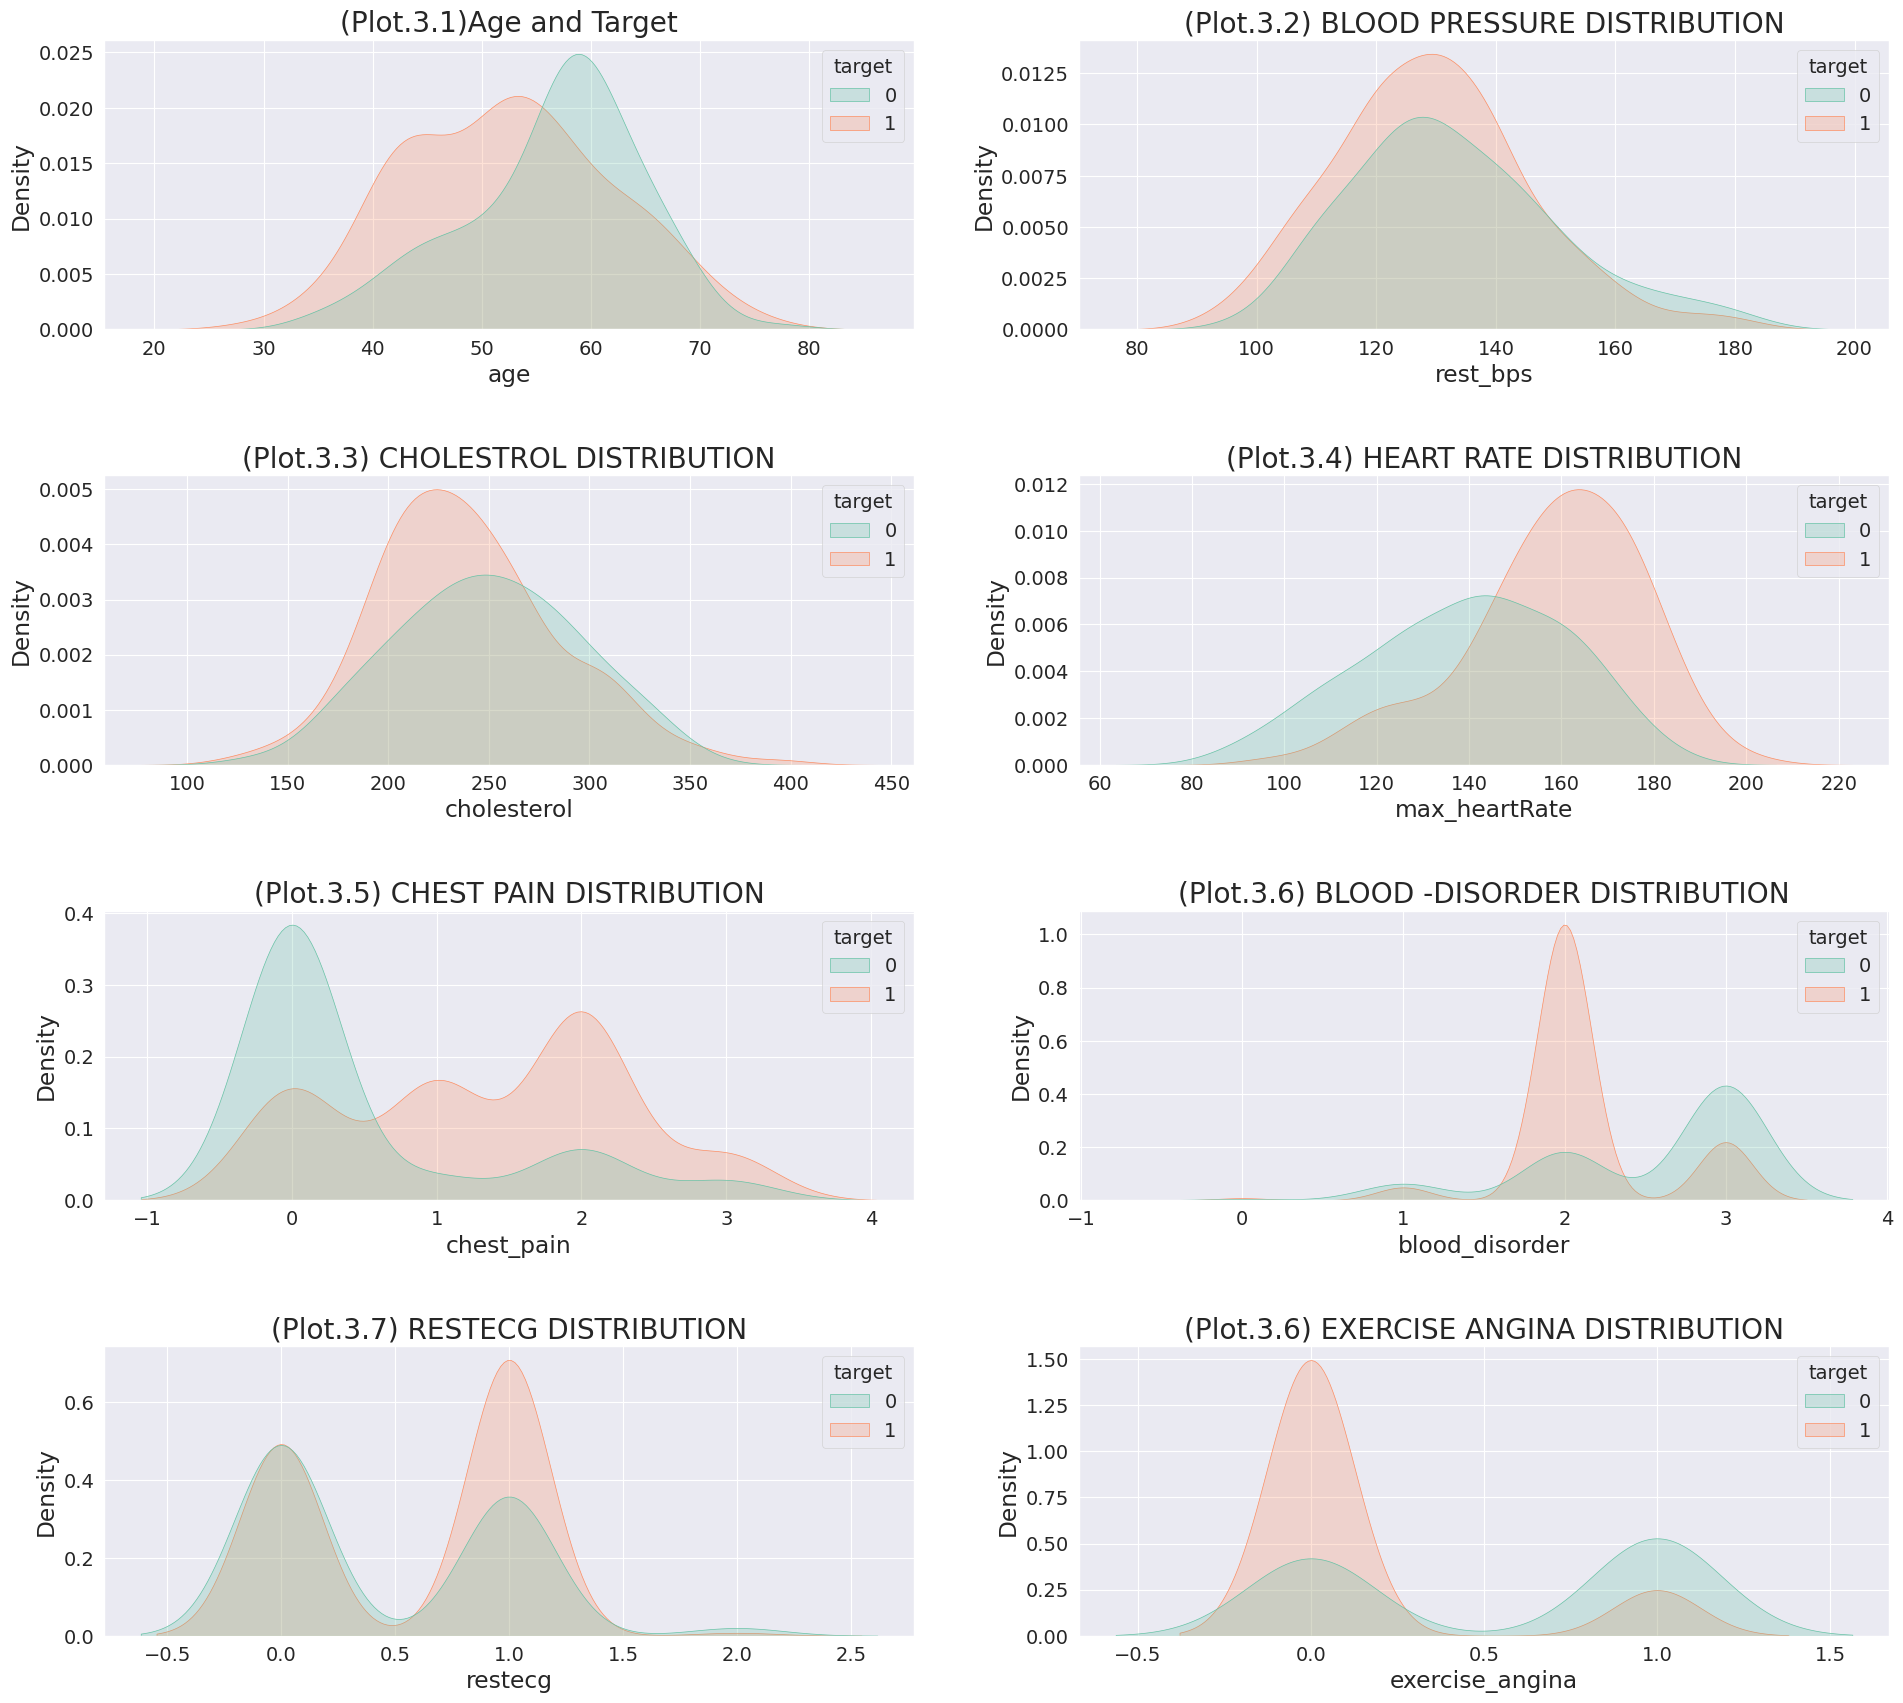

In [57]:
#Bivariate Analysis

fig, axes = plt.subplots(4,2, figsize=(20,18))

#use the axis for plotting
axes[0, 0].set_title('(Plot.3.1)Age and Target')
sb.kdeplot(x=new_dataset3.age,
            hue=new_dataset3.target,
            fill=True,
            palette= 'Set2',
            ax=axes[0,0])

#use the axis for plotting
axes[0, 1].set_title('(Plot.3.2) BLOOD PRESSURE DISTRIBUTION')
sb.kdeplot(x=new_dataset3.rest_bps,
            hue=new_dataset3.target,
            fill=True,
            palette= 'Set2',
            ax=axes[0,1])


#use the axis for plotting
axes[1, 0].set_title('(Plot.3.3) CHOLESTROL DISTRIBUTION')
sb.kdeplot(x=new_dataset3.cholesterol,
            hue=new_dataset3.target,
            fill=True,
            palette= 'Set2',
            ax=axes[1,0])


#use the axis for plotting
axes[1, 1].set_title('(Plot.3.4) HEART RATE DISTRIBUTION')
sb.kdeplot(x=new_dataset3.max_heartRate,
            hue=new_dataset3.target,
            fill=True,
            palette= 'Set2',
            ax=axes[1,1])


#use the axis for plotting
axes[2, 0].set_title('(Plot.3.5) CHEST PAIN DISTRIBUTION')
sb.kdeplot(x=new_dataset3.chest_pain,
           hue=new_dataset3.target,
           fill= True,
           palette = 'Set2',
           ax= axes[2,0])


#use the axis for plotting
axes[2, 1].set_title('(Plot.3.6) BLOOD -DISORDER DISTRIBUTION')
sb.kdeplot(x=new_dataset3.blood_disorder,
           hue=new_dataset3.target,
           fill= True,
           palette = 'Set2',
           ax= axes[2,1])


#use the axis for plotting
axes[3, 0].set_title('(Plot.3.7) RESTECG DISTRIBUTION')
sb.kdeplot(x=new_dataset3.restecg,
           hue=new_dataset3.target,
           fill= True,
           palette = 'Set2',
           ax= axes[3,0])


#use the axis for plotting
axes[3, 1].set_title('(Plot.3.6) EXERCISE ANGINA DISTRIBUTION')
sb.kdeplot(x=new_dataset3.exercise_angina,
           hue=new_dataset3.target,
           fill= True,
           palette = 'Set2',
           ax= axes[3,1])





plt.tight_layout(pad=3);

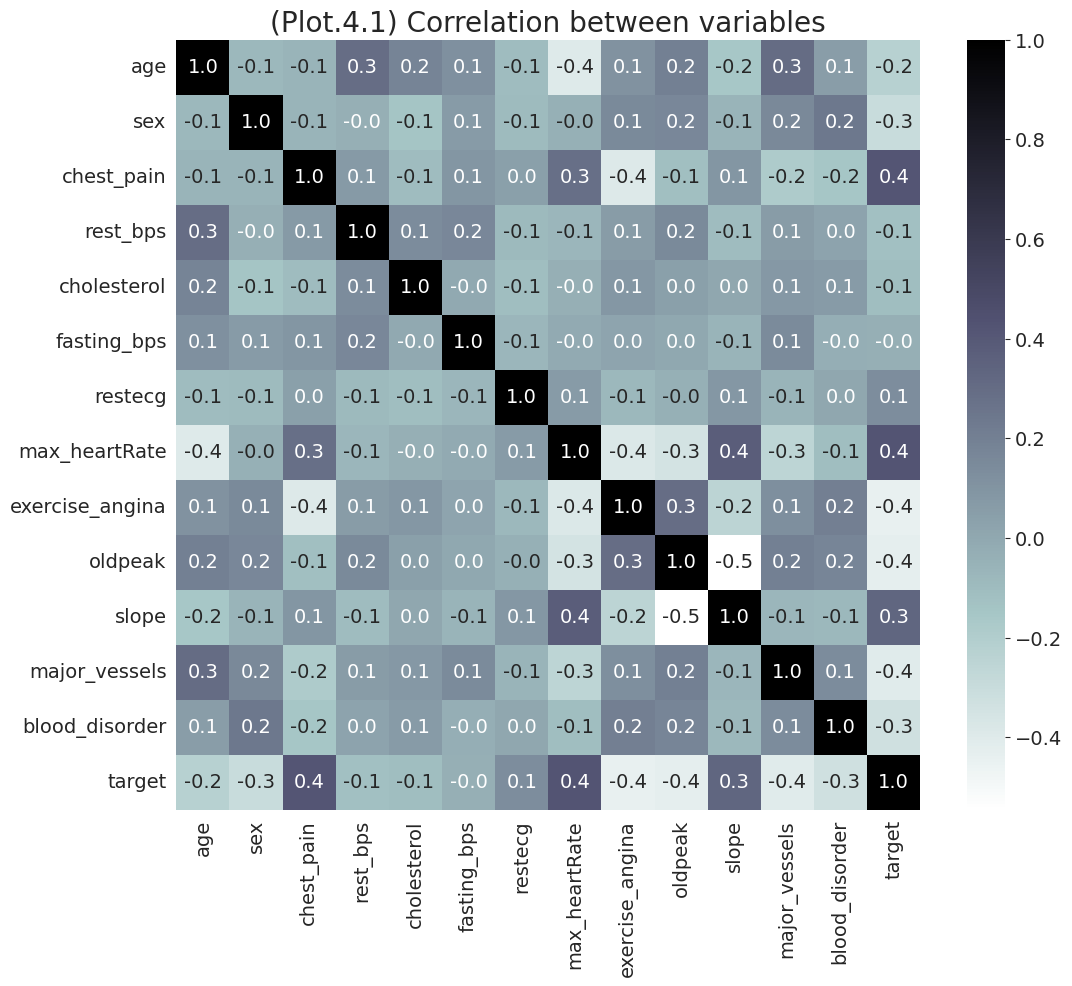

In [58]:
#Checking correlations between variables
plt.figure(figsize = (12,10))
plt.title('(Plot.4.1) Correlation between variables')
sb.heatmap(new_dataset3.corr(), fmt='.1f', annot=True, cmap= "bone_r");

In [59]:
#Multivariate Analysis

print('(Plot.5.1)')
sb.pairplot(new_dataset3, hue='target', palette="tab10");

Output hidden; open in https://colab.research.google.com to view.